# Stimulus preparation for average face experiment

### import modules

In [1]:
import os
import fnmatch

import numpy as np
from PIL import Image

import matplotlib.pylab as plt
%matplotlib inline

### get all files

In [2]:
def getFile(whichFolder, whichFile):
    
    fileList = [whichFolder+x for x in os.listdir(whichFolder) if x.endswith(whichFile) and 'cut' not in x]
    fileList.sort()
    
    return fileList

In [3]:
imgList = getFile('../faceAttract/experiment/stimuli/','.jpg')

In [4]:
imgList[-5:]

['../faceAttract/experiment/stimuli/m010_001.jpg',
 '../faceAttract/experiment/stimuli/m010_002.jpg',
 '../faceAttract/experiment/stimuli/m010_003.jpg',
 '../faceAttract/experiment/stimuli/m010_004.jpg',
 '../faceAttract/experiment/stimuli/m010_005.jpg']

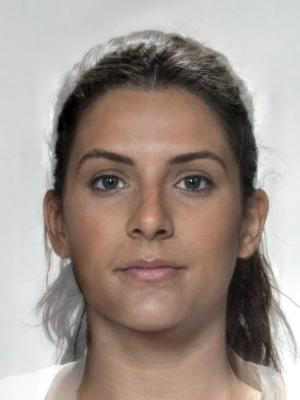

In [5]:
Image.open(imgList[0])

### get the face area

In [6]:
from PIL import Image, ImageDraw

In [7]:
def makeEllipse(inImg,cutImg):
    im = Image.open(inImg)
    
    x, y =  im.size
    eX, eY = x*.60,y*0.60 #Size of Bounding Box for ellipse

    bbox =  (int(x/2 - eX/2),
             int(y/2 - eY/2),
             int(x/2 + eX/2),
             int(y/2 + eY/2)
            )
    
    cut = im.crop(bbox)
    cut.save(cutImg)
    
    draw = ImageDraw.Draw(im)
    draw.rectangle((0,0,x,y),fill=1)
    draw.ellipse(bbox, fill=0)
    
    return cutImg

In [8]:
myImg = '../faceAttract/experiment/stimuli/f001_001.jpg'
myCut = '../faceAttract/experiment/stimuli/cuttest.jpg'
myCut = makeEllipse(myImg,myCut)

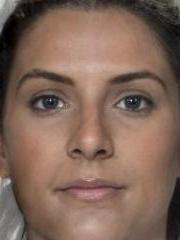

In [9]:
Image.open(myCut,'r')

### add ellipse mask

In [10]:
trans = '../faceAttract/experiment/stimuli/trans.png'

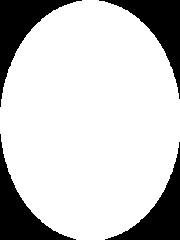

In [11]:
Image.open(trans)

In [12]:
def makeFinal(inImg,bgImg,outImg):
    background = Image.open(inImg)
    foreground = Image.open(bgImg)

    background.paste(foreground, (0, 0), foreground)
    background.save(outImg)
    #background.show()
    return outImg

In [13]:
outImg = makeFinal(myCut,trans,'../faceAttract/experiment/stimuli/eggFace.png')

In [14]:
outImg

'../faceAttract/experiment/stimuli/eggFace.png'

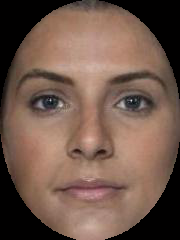

In [15]:
Image.open(outImg)

### Do this for all faces

In [16]:
import pandas as pd

In [17]:
d = {}
for imgName in imgList:
    
    # get naming of new file right
    thisName = imgName[imgName.rfind('/')+1:imgName.rfind('.')]
    outName = '../faceAttract/experiment/stimuli/%s_cut.jpg' % thisName
    
    # cut the image
    myCut = makeEllipse(imgName,outName)
    # mask with ellipse
    outImg = makeFinal(myCut,trans,outName)
    # add image names to dict
    d[thisName] = {'orig':imgName,'cut':outImg}
    
df = pd.DataFrame(d).T

In [18]:
df.tail()

,cut,orig
m010_001,../faceAttract/experiment/stimuli/m010_001_cut...,../faceAttract/experiment/stimuli/m010_001.jpg
m010_002,../faceAttract/experiment/stimuli/m010_002_cut...,../faceAttract/experiment/stimuli/m010_002.jpg
m010_003,../faceAttract/experiment/stimuli/m010_003_cut...,../faceAttract/experiment/stimuli/m010_003.jpg
m010_004,../faceAttract/experiment/stimuli/m010_004_cut...,../faceAttract/experiment/stimuli/m010_004.jpg
m010_005,../faceAttract/experiment/stimuli/m010_005_cut...,../faceAttract/experiment/stimuli/m010_005.jpg


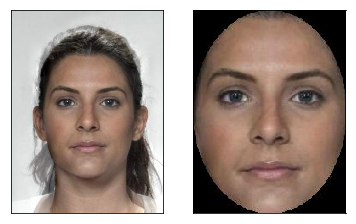

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2)
im = Image.open( df.iloc[0].orig )
ax1.imshow(im)
ax1.set_xticks([]);ax1.set_yticks([])
im = Image.open( df.iloc[0].cut )
ax2.imshow(im)
ax2.set_xticks([]);ax2.set_yticks([])
plt.show()

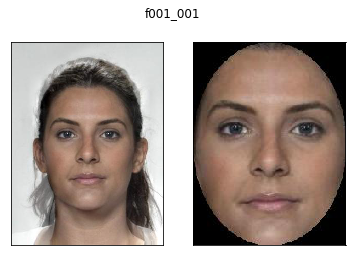

In [20]:
for i in df.index:
    fig,(ax1,ax2) = plt.subplots(1,2)
    im = Image.open( df.loc[i].orig )
    ax1.imshow(im)
    ax1.set_xticks([]);ax1.set_yticks([])
    im = Image.open( df.loc[i].cut )
    ax2.imshow(im)
    ax2.set_xticks([]);ax2.set_yticks([])
    plt.suptitle(i)
    plt.show()
    break # comment this if you want to see all stimuli